In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('finalrawdata.csv',encoding= 'unicode_escape')
df2 = pd.read_csv('Water_pond_tanks_2021.csv',encoding= 'unicode_escape')



In [61]:
#Look at the first few rows of the dataset
df2.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,4368.0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,24.0,27.0,3.2,6.5,7.0,8.0,245,5160,1.6,3.2,1.02,3.60,9,21,120,210
1,2353.0,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,26.0,29.0,3.0,6.8,6.9,7.8,599,1179,1.9,4.6,0.77,3.56,15,23,150,240
2,1790.0,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,18.0,24.0,4.2,6.0,7.2,8.2,28000,56900,2.4,2.8,1.20,1.64,3,3,47,150
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180,476,1.0,2.5,0.34,2.30,24,365,170,549
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496,734,1.0,2.3,0.35,1.00,43,289,240,727


In [53]:
#Look at the datatypes of the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      620 non-null    object 
 7   Dissolved Oxygen (mg/L) (Max)      620 non-null    object 
 8   pH (Min)                           620 non-null    object 
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      618 non-null    object 
 11  Conductivity (?mhos/cm) (Max)      618 non-null    object 

## Cleaning the Dataset ##

Looking at the types of data the dataset contains, we see that there are some of type object. We also have to consider that the rows that we cannot see might contain NaN. The dataset will be cleaned by removing any NaN values, duplicates and converting the type objects into a numeric type that can be used.

NaN values can create empty portions in out data

In [54]:
#Filter out only the columns we are interested in
#df1 refers to the filtered dataframe containig the columns below
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           613 non-null    float64
 1   Name of Monitoring Location        613 non-null    object 
 2   Type Water Body                    613 non-null    object 
 3   State Name                         613 non-null    object 
 4   Temperature
?C (Min)               613 non-null    float64
 5   Temperature
?C (Max)               613 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      613 non-null    object 
 7   Dissolved Oxygen (mg/L) (Max)      613 non-null    object 
 8   pH (Min)                           613 non-null    object 
 9   pH (Max)                           613 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      613 non-null    object 
 11  Conductivity (?mhos/cm) (Max)      613 non-null    object 
 12 

In [55]:
#Converting the column of mixed data types into only numeric values such as float
df2['Nitrate N + Nitrite N(mg/L) (Max)'] = pd.to_numeric(df2['Nitrate N + Nitrite N(mg/L) (Max)'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           613 non-null    float64
 1   Name of Monitoring Location        613 non-null    object 
 2   Type Water Body                    613 non-null    object 
 3   State Name                         613 non-null    object 
 4   Temperature
?C (Min)               613 non-null    float64
 5   Temperature
?C (Max)               613 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      613 non-null    object 
 7   Dissolved Oxygen (mg/L) (Max)      613 non-null    object 
 8   pH (Min)                           613 non-null    object 
 9   pH (Max)                           613 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      613 non-null    object 
 11  Conductivity (?mhos/cm) (Max)      613 non-null    object 
 12 

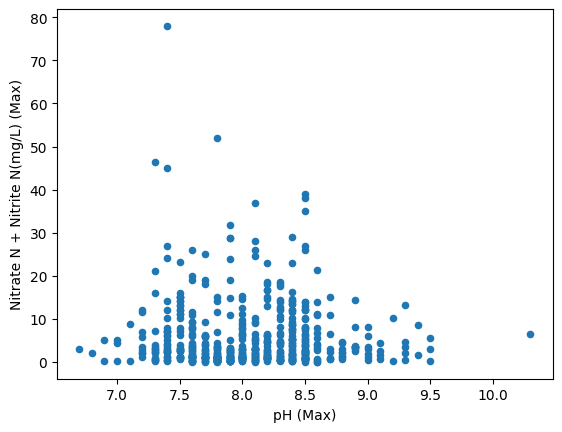

In [56]:
df2.plot(kind = 'scatter', x = 'pH (Max)', y = 'Nitrate N + Nitrite N(mg/L) (Max)')
plt.show()

In [57]:
df.head()


,ï»¿Row Labels,.ALPHA.-ENDOSULFAN,.ALPHA.-HEXACHLOROCYCLOHEXANE,.BETA.-ENDOSULFAN,.BETA.-HEXACHLOROCYCLOHEXANE,.DELTA.-HEXACHLOROCYCLOHEXANE,.LAMBDA.-CYHALOTHRIN,"1-(3,4-DICHLOROPHENYL)-3-METHYL UREA",1-CHLOROPROPANE,"1,1-DICHLOROETHANE",...,"WIND DIRECTION (DIRECTION FROM, EXPRESSED 0-360 DEG)",WIND DIRECTION FROM (CHOICE LIST),WIND SPEED (CHOICE LIST),WIND VELOCITY,XYLENE,YTTERBIUM,YTTRIUM,ZINC,ZOXAMIDE,Grand Total
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.52
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.52
2,8/30/22 14:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.230319
3,(blank),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.75
4,18.41459765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.319001


In [63]:
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69032 entries, 0 to 69031
Columns: 715 entries, ï»¿Row Labels to Grand Total
dtypes: float64(622), object(93)
memory usage: 376.6+ MB


In [81]:
df['NITRATE'] = pd.to_numeric(df['NITRATE'], errors='coerce')
df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'] = pd.to_numeric(df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'], errors='coerce')
df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'] = pd.to_numeric(df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'], errors='coerce')

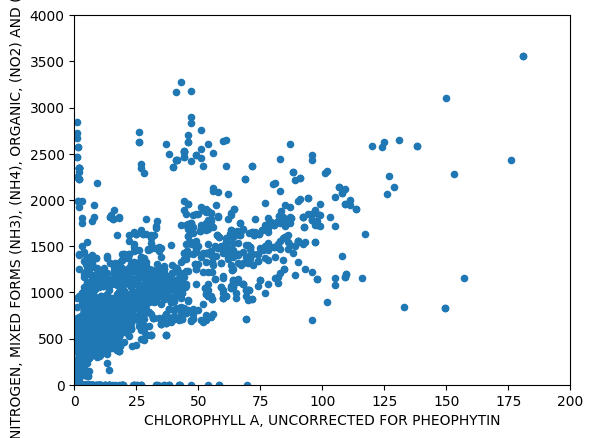

In [84]:
ax = plt.subplot(111)
df.plot(x='CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN',y='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)',ax=ax, kind='scatter')
ax.set_xlim(0,200)
ax.set_ylim(0,4000)
plt.show()

In [95]:
#Splitting the dataframe into input and output data

df = df.drop(df.columns[0], axis = 1)
y = df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN']
X = df.iloc[:, df.columns != 'CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN']

df.head()

,.ALPHA.-ENDOSULFAN,.ALPHA.-HEXACHLOROCYCLOHEXANE,.BETA.-ENDOSULFAN,.BETA.-HEXACHLOROCYCLOHEXANE,.DELTA.-HEXACHLOROCYCLOHEXANE,.LAMBDA.-CYHALOTHRIN,"1-(3,4-DICHLOROPHENYL)-3-METHYL UREA",1-CHLOROPROPANE,"1,1-DICHLOROETHANE","1,1-DICHLOROETHENE",...,"WIND DIRECTION (DIRECTION FROM, EXPRESSED 0-360 DEG)",WIND DIRECTION FROM (CHOICE LIST),WIND SPEED (CHOICE LIST),WIND VELOCITY,XYLENE,YTTERBIUM,YTTRIUM,ZINC,ZOXAMIDE,Grand Total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.52
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.52
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.230319
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.75
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.319001


In [96]:
#Preparation for a train-test split to evaluate the machine learning algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Because we separated the input and output previously, if scale them separately
#it can cause inaccurate results. The code below addresses the issue
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

ValueError: could not convert string to float: '#DIV/0!'

In [ ]:
#Testing Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')